In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
from matplotlib import pyplot as plt

In [2]:
N = 100
X = np.linspace(-np.pi, np.pi, N).reshape(N, 1)
real_y = np.sin(X)

y = real_y + 0.1 * np.random.randn(N, 1)

idx = np.random.permutation(N)
X_ = X[idx]
y_ = y[idx]

In [6]:
n = N-20
X_train = X_[:n]
y_train = y_[:n]
X_test = X_[n:]
y_test = y_[n:]

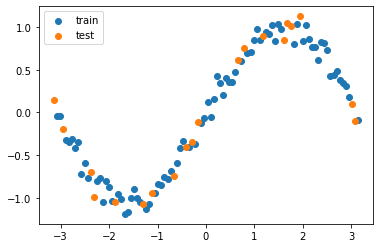

In [7]:
plt.figure()
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.legend()
plt.show()

In [11]:
# Preparing data
X_train = torch.tensor(X_train, dtype = torch.float)
label = torch.tensor(y_train, dtype = torch.float)

In [12]:
# Setting Hyperparameter
learning_rate = 1e-1
epoch = 1000
h = 10
act = nn.ReLU()

In [14]:
# Preparing Model
model = nn.Sequential(
    nn.Linear(1, h),
    act,
    nn.Linear(h, h),
    act,
    nn.Linear(h, 1)
)

In [15]:
# Preparing Loss Fn and Optimization
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

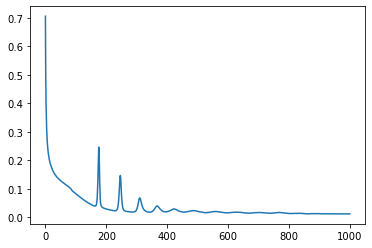

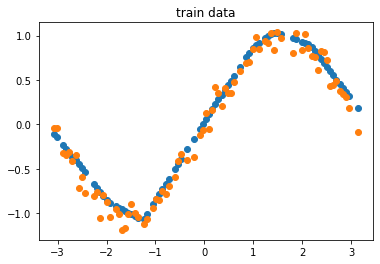

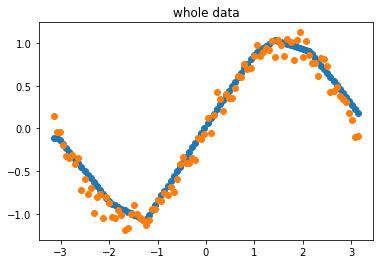

In [17]:
# Train the model

loss_array = []

for _ in range(epoch):
    optimizer.zero_grad()
    
    # forward
    output = model(X_train)
    loss = loss_fn(output, label)
    
    # backward
    loss.backward()
    optimizer.step()
    
    loss_array.append(loss)
    
X_test = torch.tensor(X_test, dtype = torch.float)
X_ = torch.tensor(X_, dtype = torch.float)

y_train_pred = model(X_train)
y_whole_pred = model(X_)

y_train_pred = y_train_pred.detach().numpy()
y_whole_pred = y_whole_pred.detach().numpy()

### plot loss
plt.figure()
plt.plot(loss_array)
plt.show()
            
plt.figure()
plt.scatter(X_train, y_train_pred, label='pred')
plt.scatter(X_train, y_train, label='target')
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_, y_whole_pred, label='pred')
plt.scatter(X_, y_, label='target')
plt.title('whole data')
plt.show()

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

import torchvision.datasets as dataset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

from matplotlib import pyplot as plt

device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

print("device: gpu") if torch.cuda.is_available() else print("device: cpu")

device: gpu


In [4]:
# hypter parameter setting
learning_rate = 1e-1 # 0.1
epochs = 50
batch_size = 60000 # gradient descent
display_step = 10

In [7]:
# load data (target_transform: one-hot encoding)
train_data = dataset.MNIST("./", train = True, transform = transforms.ToTensor(), target_transform = None, download = True)
test_data = dataset.MNIST("./", train = False, transform = transforms.ToTensor(), target_transform = None, download = True)

In [6]:
# Pre-process (batch, shuffle)
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle = True, num_workers = 1, drop_last = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = 10000, shuffle = True, num_workers = 1, drop_last = True)


In [11]:
model = nn.Linear(784, 10)
model = model.to(device)
model.train()

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

loss_array = []

for epoch in range(epochs):
    for iteration, [data, label] in enumerate(train_loader):
        optimizer.zero_grad()
        
        x = data.to(device)
        x = x.view(batch_size, -1) # such as reshape
        y = label.to(device)
        
        output = model(x)
        loss = loss_fn(output, y)
        
        loss.backward()
        optimizer.step()
        
        loss_array.append(loss.cpu().detach().numpy())
        
    if epoch % 10 == 0:
        print("Epoch:", epoch + 1, "\Loss:", loss)

Epoch: 1 \Loss: tensor(2.3337, device='cuda:1', grad_fn=<NllLossBackward>)
Epoch: 11 \Loss: tensor(1.5585, device='cuda:1', grad_fn=<NllLossBackward>)
Epoch: 21 \Loss: tensor(1.1924, device='cuda:1', grad_fn=<NllLossBackward>)
Epoch: 31 \Loss: tensor(0.9968, device='cuda:1', grad_fn=<NllLossBackward>)
Epoch: 41 \Loss: tensor(0.8775, device='cuda:1', grad_fn=<NllLossBackward>)


In [15]:
# test
model.eval() # for test
test_loader = torch.utils.data.DataLoader(
    test_data,
    batch_size = 10000,
    shuffle = True,
    num_workers = 1,
    drop_last = True)
correct = 0
total = 0

prediction_list = [] # for confusion matrix
label_list = [] # for confusion matrix

with torch.no_grad(): # for test
    for data, label in test_loader:
        x = data.to(device)
        x = x.view(-1, 784)
        y = label.to(device)
        
        prediction = model(x)
        _, prediction_index = torch.max(prediction, 1)
                
        prediction_list.append(prediction_index)
        label_list.append(y)
        
        total += y.size(0)
        correct += (prediction_index == y).sum().float()
        
print('total', total)
print('correct', correct)
print('accuracy', correct/total)

torch.return_types.max(
values=tensor([4.7947, 3.1459, 2.6995,  ..., 2.3231, 4.1936, 1.9447], device='cuda:1'),
indices=tensor([3, 0, 0,  ..., 8, 3, 8], device='cuda:1'))
total 10000
correct tensor(8480., device='cuda:1')
accuracy tensor(0.8480, device='cuda:1')


In [14]:
from sklearn.metrics import confusion_matrix
import numpy as np

prediction_array = np.array(prediction_list[0].cpu())
label_array = np.array(label_list[0].cpu())

print("prediction :", prediction_array.shape)
print("true label :", label_array.shape)

confusion_matrix(
    label_array,
    prediction_array
)

prediction : (10000,)
true label : (10000,)


array([[ 935,    0,    4,    5,    0,    7,   19,    1,    9,    0],
       [   0, 1081,    6,    6,    1,    4,    4,    0,   33,    0],
       [  18,   36,  815,   31,   21,    0,   30,   24,   53,    4],
       [   5,    6,   22,  868,    1,   25,    9,   20,   38,   16],
       [   3,   13,    5,    0,  848,    0,   20,    2,   10,   81],
       [  33,   29,   12,  122,   30,  563,   28,   17,   38,   20],
       [  23,    9,   14,    2,   14,   18,  871,    0,    7,    0],
       [   5,   42,   26,    0,   13,    0,    3,  889,   10,   40],
       [  12,   22,   15,   49,   11,   20,   20,   15,  781,   29],
       [  19,   15,   12,   13,   68,    7,    2,   34,   10,  829]])

len(train_data):  60000
len(test_data):  10000
original data shape:  torch.Size([1, 28, 28])
label:  5


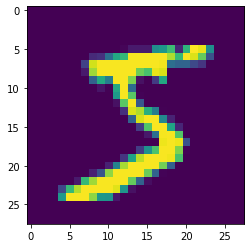

processed data shape: torch.Size([32, 1, 28, 28])
label: tensor([1, 5, 2, 6, 8, 7, 8, 1, 7, 0, 0, 8, 1, 4, 9, 6, 3, 2, 8, 1, 8, 4, 6, 1,
        1, 5, 9, 9, 7, 6, 1, 2])


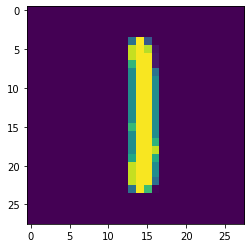

In [6]:
# load data
train_data = dataset.MNIST("./",
                           train = True,
                           transform = transforms.ToTensor(), # tensor로 자동 변경
                           target_transform = None, # one-hot encoding 할지 말지
                           download = True)
test_data = dataset.MNIST("./",
                          train = False,
                          transform = transforms.ToTensor(),
                          target_transform = None,
                          download = True)

# check the data
print('len(train_data): ', len(train_data))
print('len(test_data): ', len(test_data))

x_train, y_train = train_data[0]
print('original data shape: ', x_train.shape)
print('label: ', y_train)

plt.figure()
plt.imshow(x_train[0])
plt.show()

# Pre-process (batch, shuffle)
train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size = batch_size,
                                           shuffle = True,
                                           num_workers = 1,
                                           drop_last = True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size = 1000,
                                          shuffle = True,
                                          num_workers = 1,
                                          drop_last = True)

# check the data - one of mini batch
examples = enumerate(train_loader)
batch_idx, (example_data, example_target) = next(examples)

print('processed data shape:', example_data.shape)
print('label:', example_target)

plt.figure()
plt.imshow(example_data[0][0])
plt.show()

In [16]:
# hypter parameter setting
learning_rate = 1e-3
epochs = 25
# batch_size = 60000 # gradient descent
# batch_size = 1 # stochastic gradient descent
batch_size = 32 # mini-batch stochastic gradient descent, normally 2^n
act = nn.ReLU()
act2 = nn.Sigmoid()
h = 200
h2 = 100
display_step = 5

In [12]:
model = nn.Sequential(
    nn.Linear(np.prod(x_train.shape[1:]), h),
    act, 
    nn.Linear(h, h2),
    act2,
    nn.Linear(h2, h),
    act,
    nn.Linear(h, 10)
)
model = model.to(device)
model.train()

Sequential(
  (0): Linear(in_features=784, out_features=200, bias=True)
  (1): ReLU()
  (2): Linear(in_features=200, out_features=100, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=100, out_features=200, bias=True)
  (5): ReLU()
  (6): Linear(in_features=200, out_features=10, bias=True)
)

In [17]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

In [ ]:
loss_array = []
iteration_loss_array = []

for epoch in range(epochs):
    for iteration, [data, label] in enumerate(train_loader):
        optimizer.zero_grad()
        
        x = data.to(device)
        x = x.view(batch_size, -1) # view = reshape of np
        y = label.to(device)
        
        output = model(x)
        loss = loss_fn(output, y)
        
        loss.backward()
        optimizer.step()
        
        iteration_loss_array.append(loss.cpu().detach().numpy())
            
    loss_array.append(loss.cpu().detach().numpy())
    
    if epoch % 5 == 0:
        print("Epoch:", epoch + 1, "\Loss:", loss)

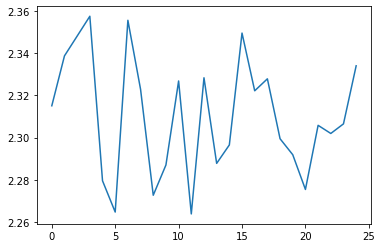

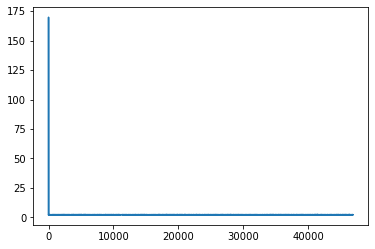

In [10]:
# plot losses
plt.figure()
plt.plot(loss_array)
plt.show()
# plot iteration losses
plt.figure()
plt.plot(iteration_loss_array)
plt.show()

In [29]:
# test
model.eval()
test_loader = torch.utils.data.DataLoader(test_data, batch_size = 10000, shuffle = True, num_workers = 1, drop_last = True)
correct = 0
total = 0

prediction_list = []
label_list = []

with torch.no_grad():
    for data, label in test_loader:
        x = data.to(device)
        x = x.view(-1, 784)
        y = label.to(device)
        
        prediction = model(x)
        _, prediction_index = torch.max(prediction, 1)
                
        prediction_list.append(prediction_index)
        label_list.append(y)
        
        total += y.size(0)
        correct += (prediction_index == y).sum().float()
        
print('total', total)
print('correct', correct)
print('accuracy', correct/total)

total 10000
correct tensor(1135., device='cuda:1')
accuracy tensor(0.1135, device='cuda:1')


In [30]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
    
prediction_array = np.array(prediction_list[0].cpu())
label_array = np.array(label_list[0].cpu())

print("prediction :", prediction_array.shape)
print("true label :", label_array.shape)

confusion_matrix(
    label_array,
    prediction_array) # y_pred

prediction : (10000,)
true label : (10000,)


array([[   0,  980,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1135,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1032,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1010,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,  982,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,  892,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,  958,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1028,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,  974,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1009,    0,    0,    0,    0,    0,    0,    0,    0]])